In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from six import StringIO
from IPython.display import Image
import pydotplus

# Load Heart Disease dataset
url = "https://raw.githubusercontent.com/GuySuphakit/Heart-Failure-Prediction/main/heart.csv"
heart = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
display(heart.head())


✅ Dataset loaded successfully!


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Show dataset info
display(heart.head())
display(heart.info())


# Check for categorical columns (most are numeric here)
display(heart.describe())

#convert categorical values (if any) using get_dummies
heart = pd.get_dummies(heart, drop_first=True)

print("✅ Data prepared successfully!")


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


✅ Data prepared successfully!


In [23]:
# Features & Target
X = heart.drop("HeartDisease", axis=1)   # Features
y = heart["HeartDisease"]                # Target (0 = No Disease, 1 = Disease)

print("✅ Features and target variable defined successfully!")


✅ Features and target variable defined successfully!


In [24]:
# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [25]:
# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.7427536231884058


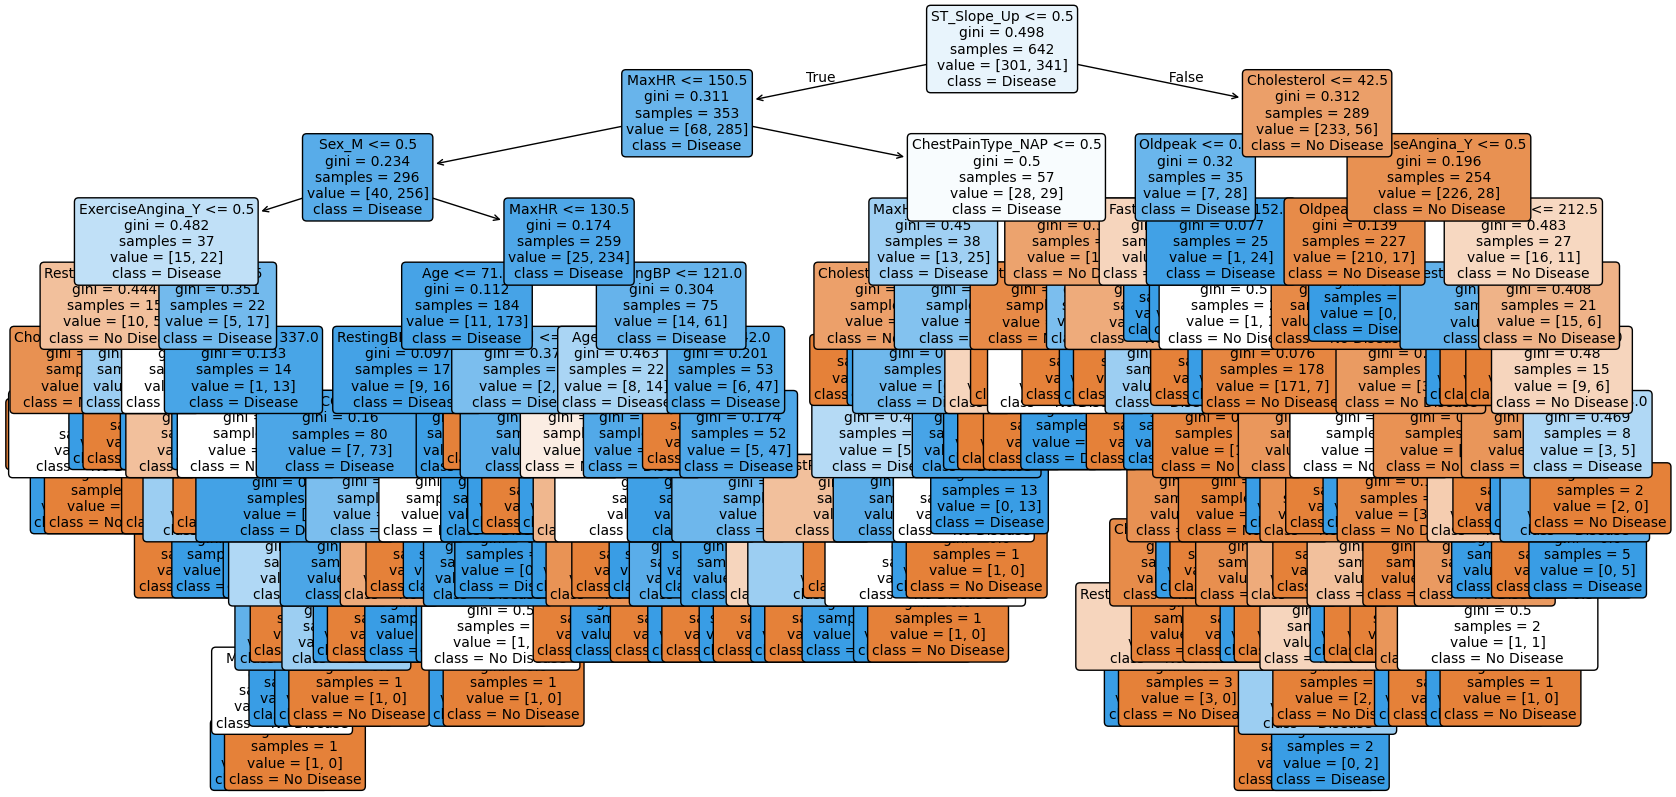

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['No Disease','Disease'], 
          filled=True, rounded=True, fontsize=10)
plt.show()


In [27]:
# Decision Tree with Entropy criterion and max depth 4
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=1)
clf2.fit(X_train, y_train)

# Predict on test set
y_pred2 = clf2.predict(X_test)

# Accuracy
print("Decision Tree (Entropy, depth=4) Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Decision Tree (Entropy, depth=4) Accuracy: 0.8260869565217391


Small Tree Accuracy: 0.8297101449275363


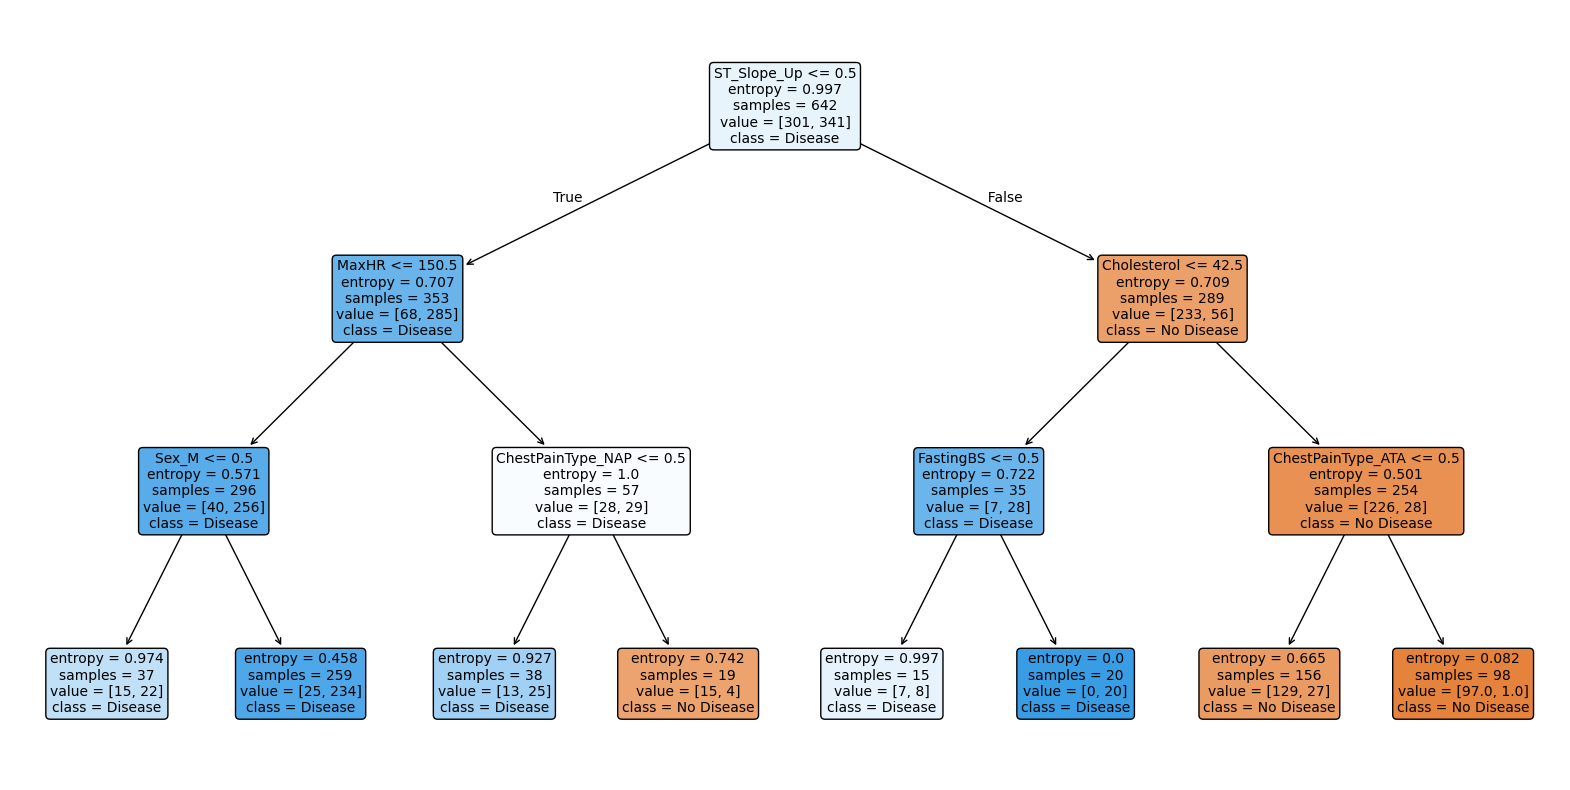

In [28]:
# Train a smaller Decision Tree
clf_small = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
clf_small.fit(X_train, y_train)

# Evaluate
y_pred_small = clf_small.predict(X_test)
print("Small Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_small))

# Plot the Decision Tree clearly
plt.figure(figsize=(20,10))
plot_tree(clf_small, 
          feature_names=X.columns, 
          class_names=['No Disease','Disease'], 
          filled=True, rounded=True, fontsize=10)
plt.show()